# SparseCoding

This notebook gives you the hints of how to use sparse coding for image denosing.  

## Dictionaries

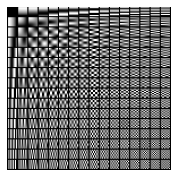

In [2]:
from sparsecodingtools.dictionaries import DCTDictionary
import matplotlib.pyplot as plt

# overcomplete DCT-dictionary (8^2 x 16^2)
d1 = DCTDictionary(8, 16)

############################################################
# Substitude the DCT-dictonary with your implemented in Q1 #
############################################################
# d1 = YOURDCTDICT

plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(d1.to_img(), cmap='gray')
plt.show()

## K-SVD Image Denoising

In [6]:
import matplotlib.pyplot as plt
from sparsecodingtools.applications.denoising import KSVDImageDenoiser
from sparsecodingtools.applications.utils import example_image
from sparsecodingtools.pursuits import MatchingPursuit
from sparsecodingtools.dictionaries import DCTDictionary

# load input image
original_img = example_image('The-Barbara-image-512-512_Q640')
noisy_img = example_image('The-Barbara-image-512-512_Q640', noise_std=20)

# set patch size
patch_size = 8

# initialize denoiser
initial_dictionary = DCTDictionary(patch_size, 11)
############################################################
# Substitude the DCT-dictonary with your implemented in Q1 #
############################################################
# initial_dictionary = YOURDCTDICT

denoiser = KSVDImageDenoiser(initial_dictionary, pursuit=MatchingPursuit)

# denoise image
z, d, a = denoiser.denoise(noisy_img, sigma=20, patch_size=patch_size,
                           n_iter=4, multiplier=0.5, noise_gain=1.075)

INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:Entering sparse coding stage...
INFO:root:Sparse coding stage ended.
INFO:root:reconstructing


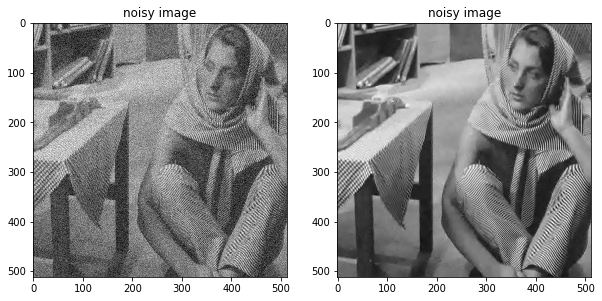

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('noisy image')
plt.imshow(noisy_img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('denoised image')
plt.imshow(z, cmap='gray')